## 📊 **Model Evaluation Metrics for Regression and Classification**

---

### 🔎 **Model Evaluation for Regression**

#### 📉 **Mean Squared Error (MSE)**  
- Formula:  
  \[
  \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
  \]  
- Measures the **average squared difference** between predicted (\(\hat{y}_i\)) and actual (\(y_i\)) values.  
- **Sensitive to outliers** because errors are squared, giving more weight to large deviations.  
- Commonly used for training linear regression models.  

#### 📏 **Mean Absolute Error (MAE)**  
- Formula:  
  \[
  \text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
  \]  
- Measures the **average absolute difference** between predictions and actual values.  
- **Less sensitive to outliers** than MSE.  
- Easier to interpret since it represents average error in original units.  

#### 📐 **Root Mean Squared Error (RMSE)**  
- Formula:  
  \[
  \text{RMSE} = \sqrt{\text{MSE}}
  \]  
- Square root of MSE, keeping units the same as the target variable.  
- Provides a direct sense of prediction error magnitude.  

---

### 🧠 **Model Evaluation for Classification**

#### ✅ **Accuracy**  
- Formula:  
  \[
  \text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}
  \]  
- **Proportion of correctly predicted instances**.  
- Works well for **balanced datasets**.  
- Can be **misleading** when classes are imbalanced (e.g., 95% negative class).  

---

#### 🎯 **Precision (Positive Predictive Value)**  
- Formula:  
  \[
  \text{Precision} = \frac{\text{TP}}{\text{TP + FP}}
  \]  
- Fraction of **positive predictions** that are actually correct.  
- Critical for use cases like **fraud detection** or **spam filtering**, where **false positives** are costly.  

---

#### 📡 **Recall (Sensitivity or True Positive Rate)**  
- Formula:  
  \[
  \text{Recall} = \frac{\text{TP}}{\text{TP + FN}}
  \]  
- Fraction of **actual positives** correctly identified.  
- Important for tasks like **disease diagnosis**, where **missing positive cases** (false negatives) can have serious consequences.  

---

#### ⚖ **F1-Score**  
- Formula:  
  \[
  \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}}
  \]  
- **Harmonic mean** of Precision and Recall.  
- Useful when you need a **balance** between Precision and Recall, especially in **imbalanced datasets**.  

---

#### 🧾 **Confusion Matrix**  
- A table summarizing predictions:  
  |                | **Predicted Positive** | **Predicted Negative** |  
  |----------------|----------------------|----------------------|  
  | **Actual Positive** | TP (True Positive)   | FN (False Negative)   |  
  | **Actual Negative** | FP (False Positive)  | TN (True Negative)    |  

- **Visualizes model performance** across all classes.  
- Helps identify specific errors, such as **false positives** vs. **false negatives**.  

---

### 💡 **Key Takeaways**
- **Regression metrics** (MSE, MAE, RMSE) measure **error magnitude** in continuous predictions.  
- **Classification metrics** (Accuracy, Precision, Recall, F1-score, Confusion Matrix) measure **categorical prediction quality**.  
- Choose metrics based on **data balance** and **application needs**:  
  - Use **Precision/Recall/F1** for imbalanced classes.  
  - Use **MSE/RMSE** for regression tasks where large errors matter.  


# 📚 Introduction to Cross-Validation

Cross-validation is a technique used to **evaluate the performance of a machine learning model**.  
Instead of testing on a single train-test split, cross-validation tests on **multiple subsets** of the data to ensure the model generalizes well.

---

## 🔑 Key Cross-Validation Techniques

### 1️⃣ **K-Fold Cross-Validation**
- **How it works**:  
  1. Split the dataset into **K equal parts** (called folds).  
  2. Train the model on **K − 1 folds** and test on the remaining fold.  
  3. Repeat this process **K times**, using a different fold for testing each time.  
  4. Compute the **average accuracy** (or another metric) across all K runs as the final score.

- **Formula for the final evaluation metric**:  
  \[
  \text{Score} = \frac{1}{K} \sum_{i=1}^{K} \text{Score}_i
  \]  
  Where \(\text{Score}_i\) is the evaluation metric (e.g., accuracy) on the \(i^{th}\) fold.

- ✅ **Advantage**: Uses all data points for both training and testing.  
- ❌ **Disadvantage**: Takes longer to run because the model is trained K times.  

---

### 2️⃣ **Stratified K-Fold Cross-Validation**
- **Special version of K-Fold** used for **classification problems**.  
- Ensures **each fold has the same proportion of classes** as the full dataset.  
- 🧠 **Why it matters**: Prevents folds from being biased if the dataset is imbalanced.

---

### 3️⃣ **Leave-One-Out Cross-Validation (LOOCV)**
- Extreme case of K-Fold where **K = n** (number of data points).  
- **How it works**:  
  - Train the model on **n − 1 samples** and test on the **one remaining sample**.  
  - Repeat this process for **every data point**.  
- **Formula for the final score**:  
  \[
  \text{Score} = \frac{1}{n} \sum_{i=1}^{n} \text{Score}_i
  \]  
- ✅ **Advantage**: Uses almost all data for training each time, giving a nearly unbiased estimate.  
- ❌ **Disadvantage**: **Very slow** for large datasets (training happens n times).  

---

## 🌟 **Advantages of Cross-Validation**
- 🛡 **Reduces Overfitting**: Tests the model on multiple data subsets, ensuring it performs well on unseen data.  
- 🌍 **More Generalized Evaluation**: Gives a **better estimate of real-world performance** compared to a single train-test split.  
- 📊 **Efficient Use of Data**: All samples are used for both training and testing.  

---

### 🧠 **Simple Explanation**
Think of cross-validation like **rotating players in a game**:  
- Instead of letting some players (data) sit out every match, **everyone gets a chance** to play and be evaluated.  
- This makes sure the team’s (model’s) performance is tested fairly on all players (data points).

---

### ▶ **Optional: Quick Python Example**
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Load data
X, y = load_iris(return_X_y=True)

# Define the model
model = LogisticRegression(max_iter=200)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


# 🧮 Understanding the Confusion Matrix

The **confusion matrix** is a table used to **evaluate the performance** of a classification model.  
It compares the **predicted labels** with the **actual labels**, helping identify where the model performs well or poorly.

---

## 📊 **Structure of a Confusion Matrix**

|                     | **Predicted Positive** | **Predicted Negative** |
|---------------------|-----------------------|-----------------------|
| **Actual Positive** | True Positive (TP)    | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)   | True Negative (TN)    |

- **TP (True Positive)**: Correctly predicted positive cases.  
- **TN (True Negative)**: Correctly predicted negative cases.  
- **FP (False Positive)**: Incorrectly predicted positive cases (Type I error).  
- **FN (False Negative)**: Missed positive cases (Type II error).  

---

## 🧠 **Key Metrics Derived from the Confusion Matrix**

### ✅ **True Positive Rate (TPR) / Recall**
Measures how many actual positives were correctly identified.  
\[
\text{TPR (Recall)} = \frac{\text{TP}}{\text{TP + FN}}
\]  
- High TPR means the model successfully captures most positive cases.

---

### ⚠ **False Positive Rate (FPR)**
Proportion of negatives incorrectly classified as positives.  
\[
\text{FPR} = \frac{\text{FP}}{\text{FP + TN}}
\]  
- Low FPR is important in tasks where false alarms are costly (e.g., fraud detection).

---

### 📉 **Specificity**
Proportion of actual negatives correctly identified.  
\[
\text{Specificity} = \frac{\text{TN}}{\text{TN + FP}} = 1 - \text{FPR}
\]  
- High specificity means the model rarely misclassifies negatives as positives.  

---

## 💡 **Intuition**
- **TPR (Recall)** focuses on **catching positives** (minimizing missed cases).  
- **FPR** highlights **false alarms**.  
- **Specificity** measures how good the model is at recognizing negatives.  

---

### ▶ **Optional: Quick Python Example**
```python
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load data and prepare binary classification
digits = load_digits()
X = digits.data
y = (digits.target == 1).astype(int)  # Classify digit "1" vs others

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not 1", "1"])
disp.plot(cmap="Blues")


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Load datasets
data = load_iris() 
X, y = data.data, data.target

# Initialize classifier
model = RandomForestClassifier(random_state = 42)

# Perform K-Fold cross-validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(model, X, y, cv = kf, scoring = "accuracy")

# Output Results
print("Cross-Validation Scores: ", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())

Cross-Validation Scores:  [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy:  0.9600000000000002


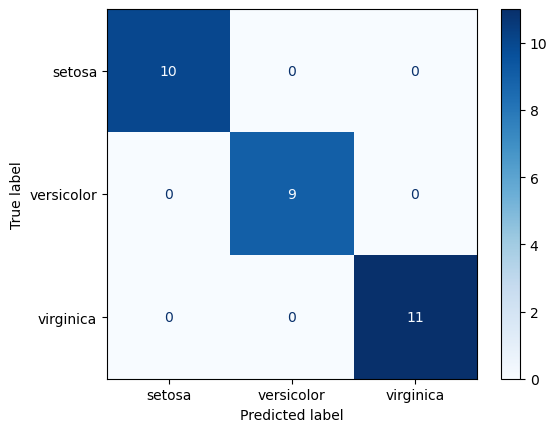


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))